在  bill_detail_2 基础上添加数据
银行卡数目，每张银行卡记录最大数，先删除缺失值（0.0），再做平均值

In [7]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
names = ["userid","time","bank_id","pre_amount_of_bill","pre_repayment","credit_amount",\
         "amount_of_bill_left","least_repayment","consume_amount","amount_of_bill","adjust_amount",\
         "circ_interest","avail_amount","prepare_amount","repayment_state"]

bill_train = pd.read_csv("../../pcredit/train/bill_detail_train.txt",header=None)
bill_test = pd.read_csv("../../pcredit/test/bill_detail_test.txt",header=None)

bill_train.columns=names
bill_test.columns=names

In [51]:
target = pd.read_csv('../../pcredit/train/overdue_train.txt',
                         header=None)
target.columns = ['userid', 'label']
bill_train  = pd.merge(bill_train,target,on='userid')
bill_train.head()

,userid,time,bank_id,pre_amount_of_bill,pre_repayment,credit_amount,amount_of_bill_left,least_repayment,consume_amount,amount_of_bill,adjust_amount,circ_interest,avail_amount,prepare_amount,repayment_state,label
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0,0


[pyton 子图](http://matplotlib.org/examples/pylab_examples/subplots_demo.html)

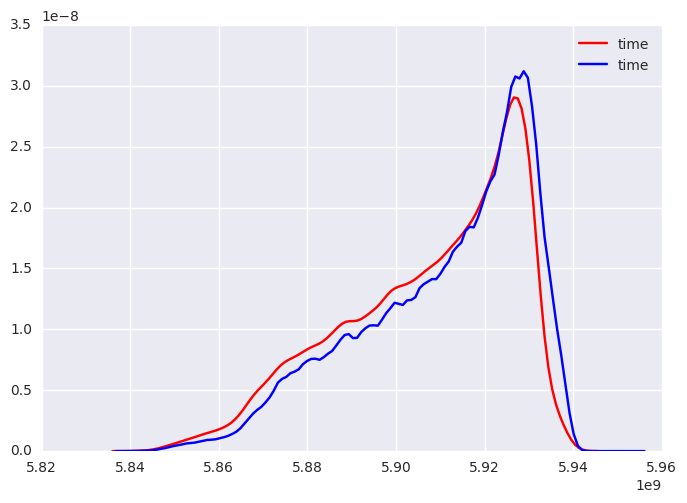

In [105]:
# time
data = bill_train[bill_train['time']>5840000000]
sns.kdeplot(data['time'][data['label']==1],color='r')
sns.kdeplot(data['time'][data['label']==0],color='b')
plt.show()

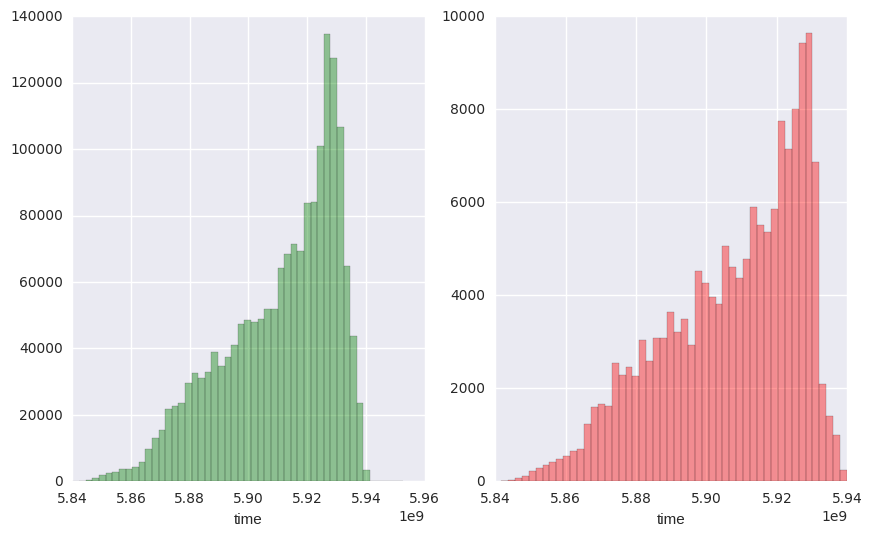

In [70]:
# time,时间为 0 的和 小于 5840000000 的数据删除
data = bill_train[(bill_train['time']>5840000000)&(bill_train['label']==0)]['time']

data1 =  bill_train[(bill_train['time']>5840000000)&(bill_train['label']==1)]['time']
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data,ax=axes[0],color='g',kde=False)
sns.distplot(data1,ax=axes[1],color='r',kde=False)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

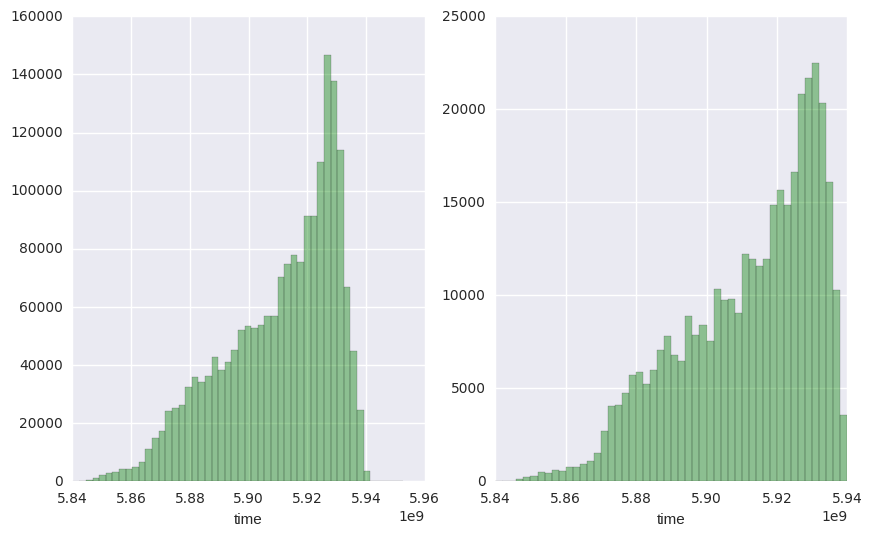

In [63]:
# time,时间为 0 的和 小于 5840000000 的数据删除
data = bill_train[bill_train['time']>5840000000]['time']

data1 = bill_test[bill_test['time']>5840000000]['time']
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data,ax=axes[0],color='g',kde=False)
sns.distplot(data1,ax=axes[1],color='g',kde=False)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

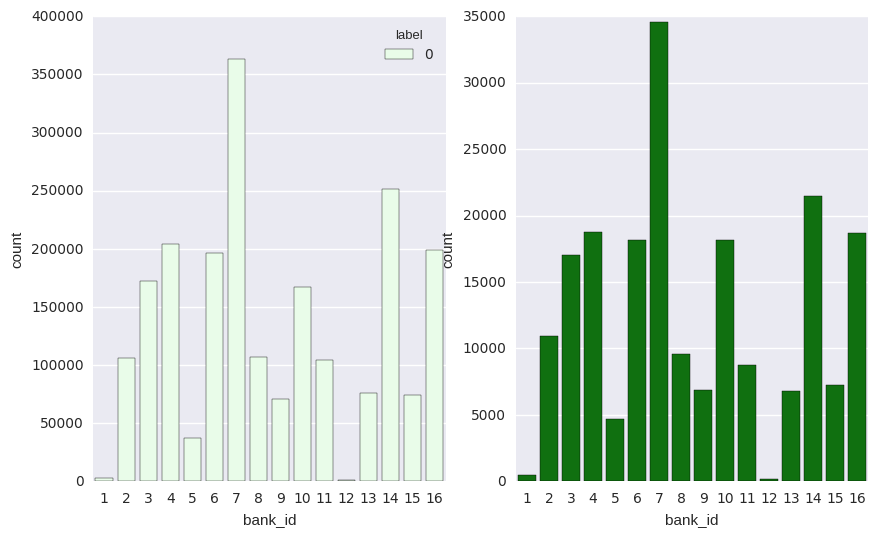

In [72]:
# bank_id
data = bill_train[(bill_train['bank_id']<20)&(bill_train['label']==0)][['bank_id','label']]
data1 = bill_train[(bill_train['bank_id']<20)&(bill_train['label']==1)][['bank_id','label']]
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.countplot(x='bank_id',hue='label',data=data,ax=axes[0],color='g')
sns.countplot(x='bank_id',data=data1,ax=axes[1],color='g')
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

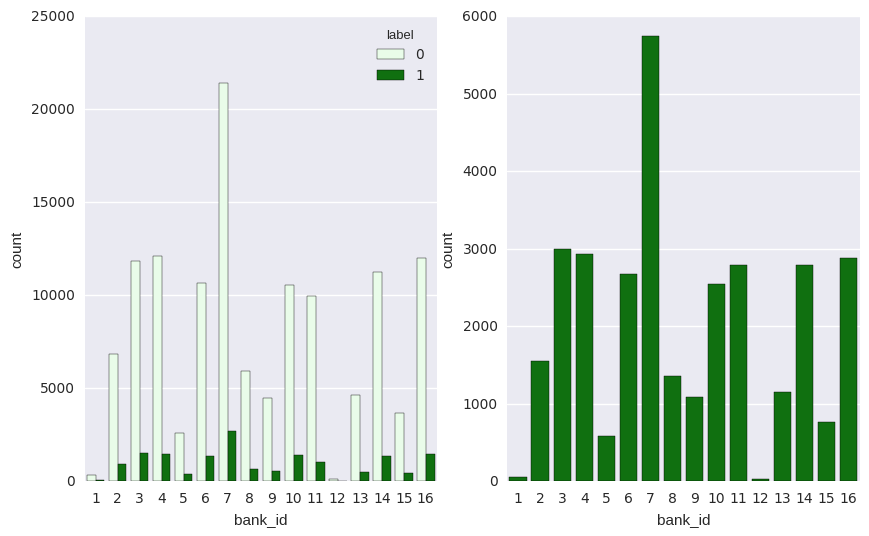

In [81]:
# bank_id
data = bill_train[bill_train['bank_id']<20][['userid','bank_id','label']]
data.drop_duplicates(inplace=True)
data1 = bill_test[bill_test['bank_id']<20][['userid','bank_id']]
data1.drop_duplicates(inplace=True)
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.countplot(x='bank_id',hue='label',data=data,ax=axes[0],color='g')
sns.countplot(x='bank_id',data=data1,ax=axes[1],color='g')
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

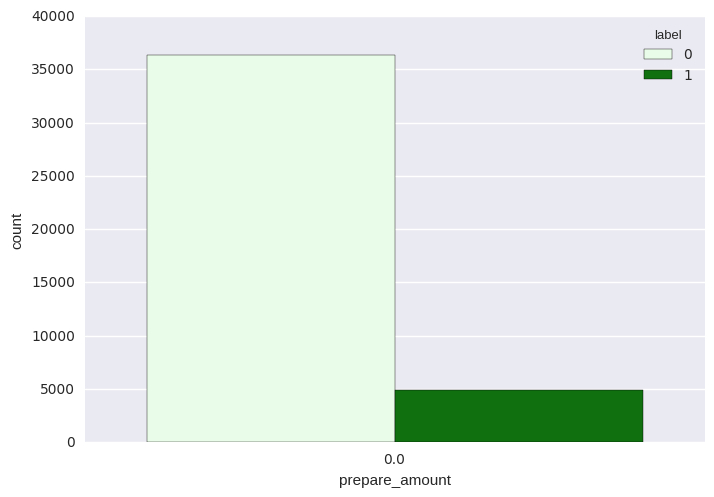

In [80]:
# prepare_amount
data = bill_train[bill_train['prepare_amount']==0][['userid','prepare_amount','label']]
data.drop_duplicates(inplace=True)
sns.countplot(x='prepare_amount',data=data,hue='label',color='g')
plt.show()

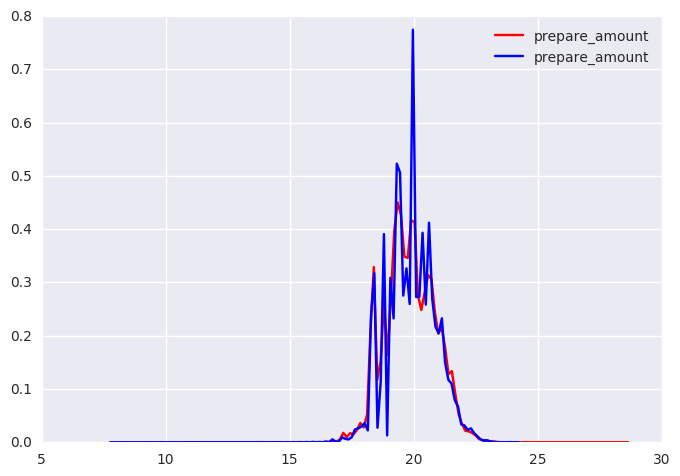

In [82]:
# prepare_amount
data = bill_train[bill_train['prepare_amount']>0]
sns.kdeplot(data['prepare_amount'][data['label']==1],color='r')
sns.kdeplot(data['prepare_amount'][data['label']==0],color='b')
plt.show()

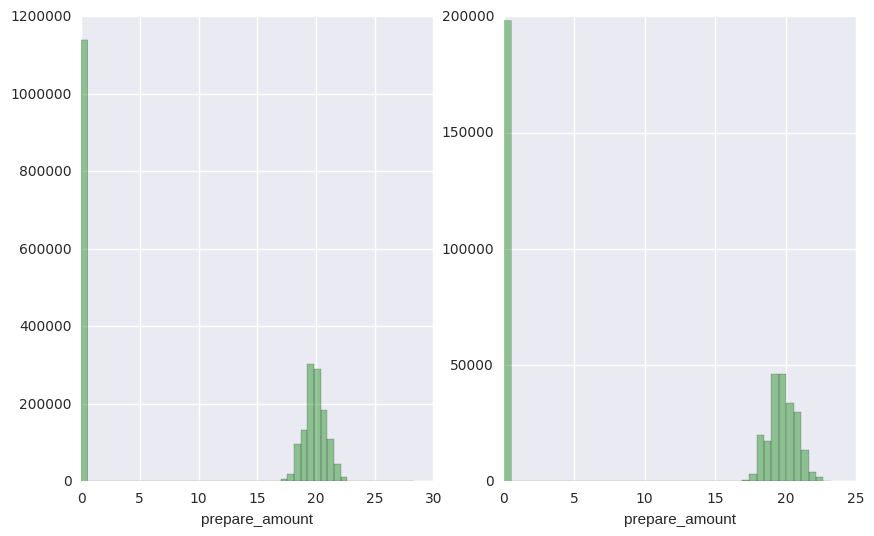

In [45]:
# prepare_amount
data = bill_train['prepare_amount']
data1 = bill_test['prepare_amount']
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data,ax=axes[0],color='g',kde=False)
sns.distplot(data1,ax=axes[1],color='g',kde=False)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

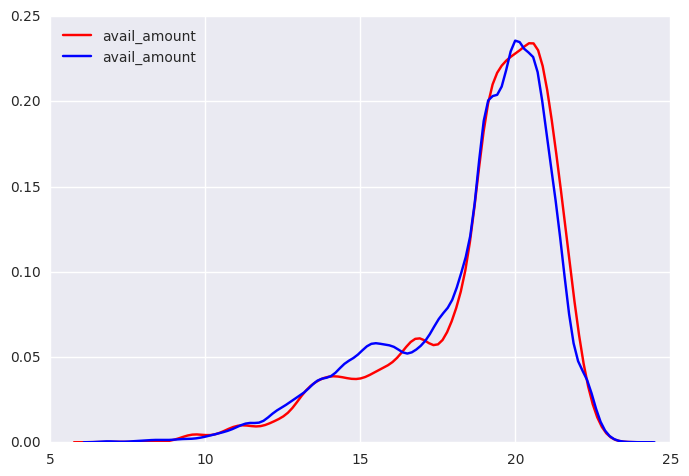

In [84]:
# avail_amount
data = bill_train[bill_train['avail_amount']>0]
sns.kdeplot(data['avail_amount'][data['label']==1],color='r')
sns.kdeplot(data['avail_amount'][data['label']==0],color='b')
plt.show()

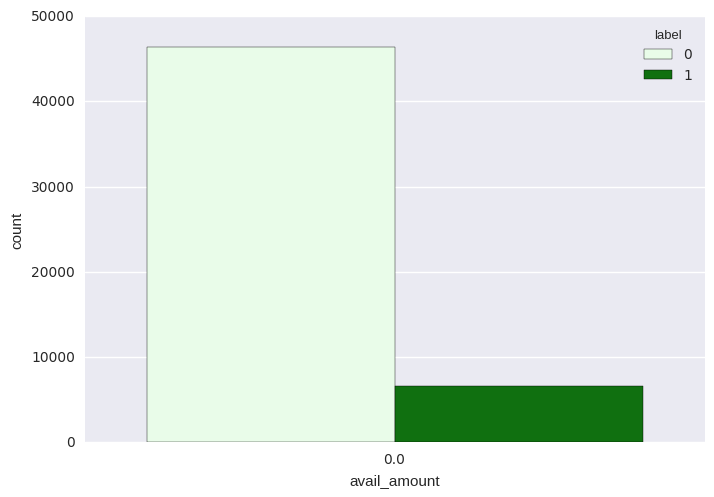

In [85]:
# avail_amount
data = bill_train[bill_train['avail_amount']==0][['userid','avail_amount','label']]
data.drop_duplicates(inplace=True)
sns.countplot(x='avail_amount',data=data,hue='label',color='g')
plt.show()

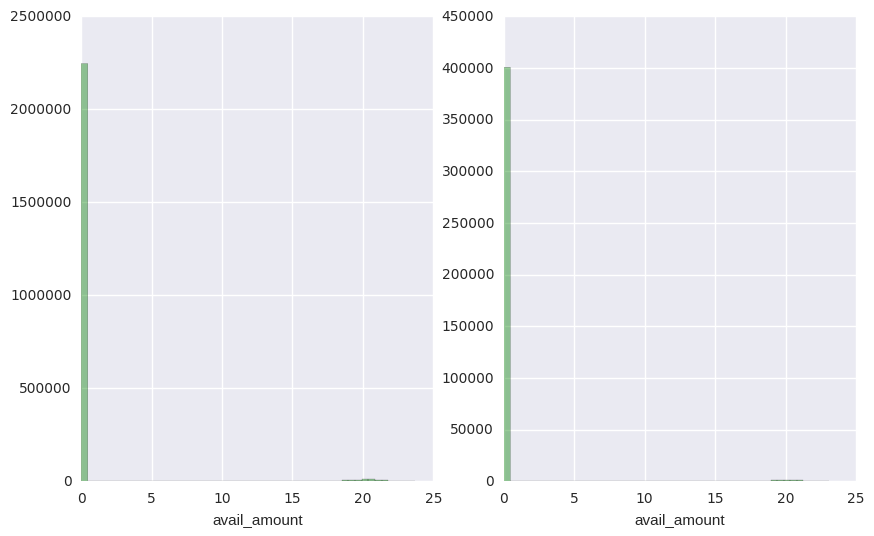

In [64]:
# avail_amount
data = bill_train[bill_train['avail_amount']>=0]['avail_amount']
data1 = bill_test[bill_test['avail_amount']>=0]['avail_amount']
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data,ax=axes[0],color='g',kde=False)
sns.distplot(data1,ax=axes[1],color='g',kde=False)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

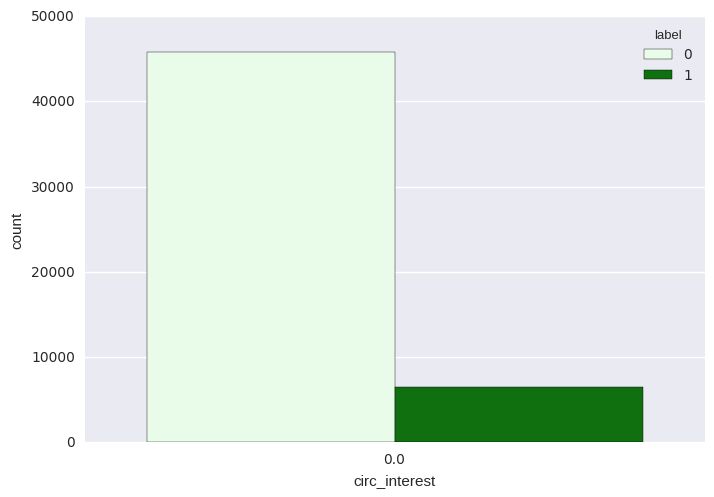

In [86]:
# circ_interest
data = bill_train[bill_train['circ_interest']==0][['userid','circ_interest','label']]
data.drop_duplicates(inplace=True)
sns.countplot(x='circ_interest',data=data,hue='label',color='g')
plt.show()

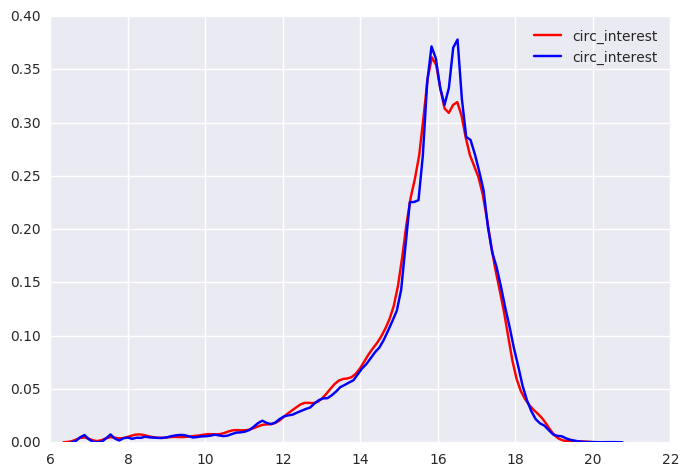

In [87]:
# circ_interest
data = bill_train[bill_train['circ_interest']>0]
sns.kdeplot(data['circ_interest'][data['label']==1],color='r')
sns.kdeplot(data['circ_interest'][data['label']==0],color='b')
plt.show()

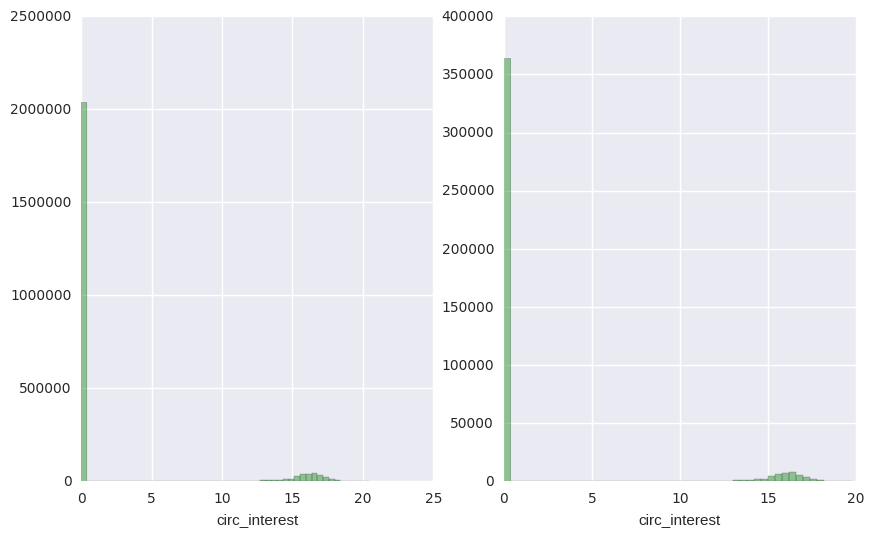

In [42]:
# circ_interest
data = bill_train['circ_interest']
data1 = bill_test['circ_interest']
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data,ax=axes[0],color='g',kde=False)
sns.distplot(data1,ax=axes[1],color='g',kde=False)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

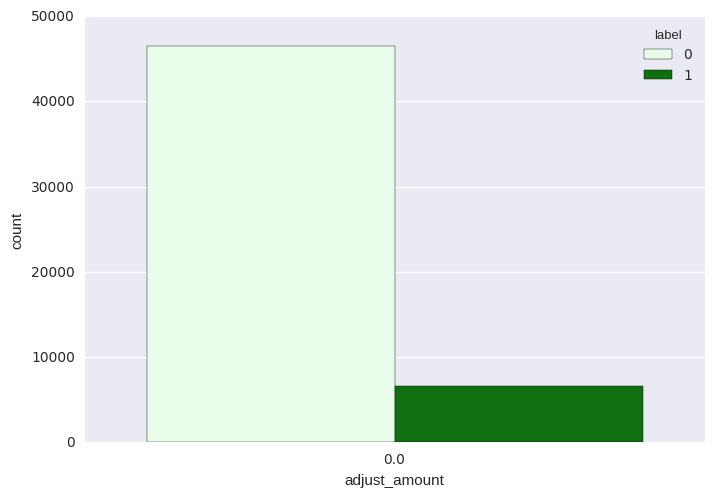

In [88]:
# adjust_amount
data = bill_train[bill_train['adjust_amount']==0][['userid','adjust_amount','label']]
data.drop_duplicates(inplace=True)
sns.countplot(x='adjust_amount',data=data,hue='label',color='g')
plt.show()

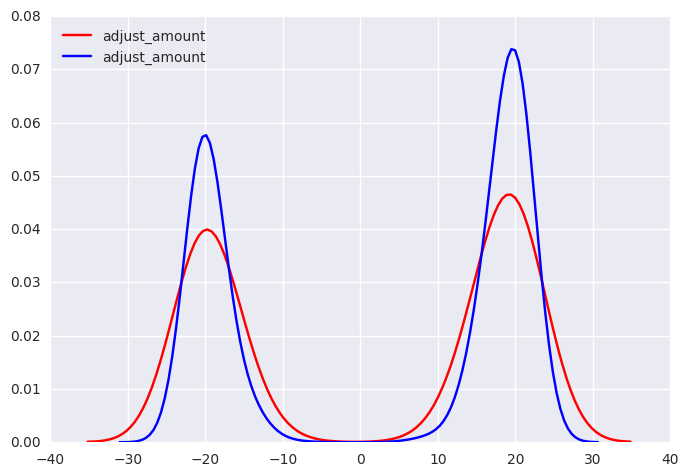

In [89]:
# adjust_amount
data = bill_train[bill_train['adjust_amount']!=0]
sns.kdeplot(data['adjust_amount'][data['label']==1],color='r')
sns.kdeplot(data['adjust_amount'][data['label']==0],color='b')
plt.show()

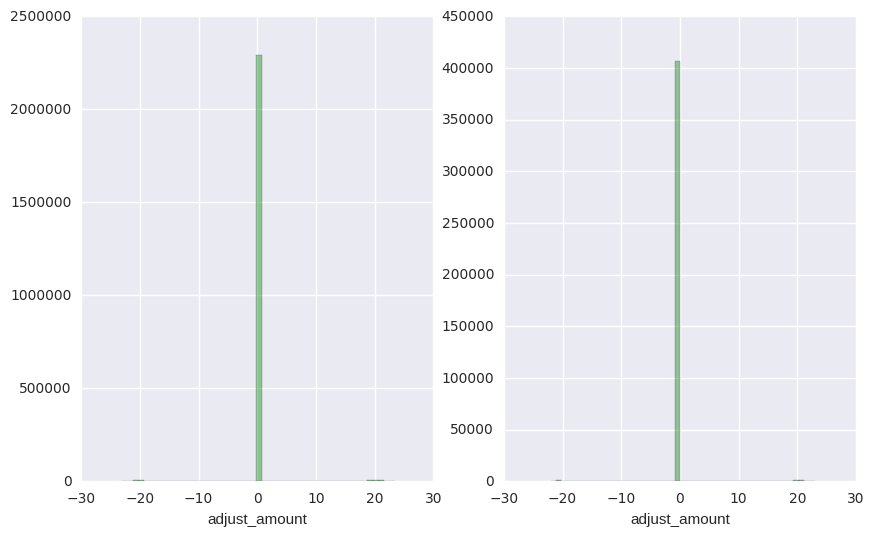

In [41]:
# adjust_amount
data = bill_train['adjust_amount']
data1 = bill_test['adjust_amount']
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data,ax=axes[0],color='g',kde=False)
sns.distplot(data1,ax=axes[1],color='g',kde=False)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

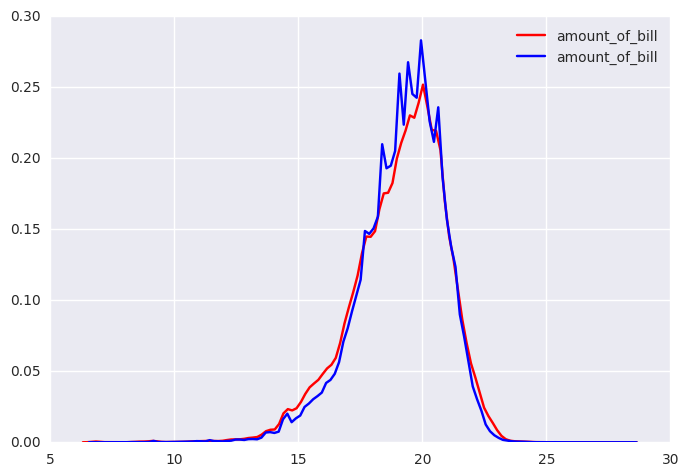

In [90]:
# amount_of_bill
data = bill_train[bill_train['amount_of_bill']>0]
sns.kdeplot(data['amount_of_bill'][data['label']==1],color='r')
sns.kdeplot(data['amount_of_bill'][data['label']==0],color='b')
plt.show()

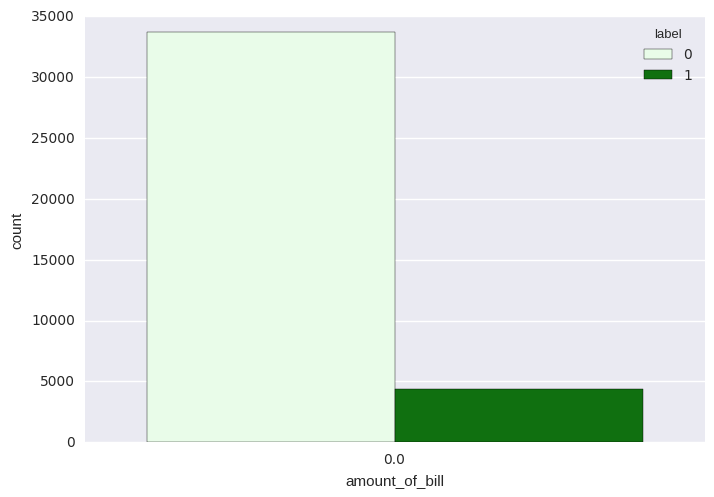

In [91]:
# amount_of_bill
data = bill_train[bill_train['amount_of_bill']==0][['userid','amount_of_bill','label']]
data.drop_duplicates(inplace=True)
sns.countplot(x='amount_of_bill',data=data,hue='label',color='g')
plt.show()

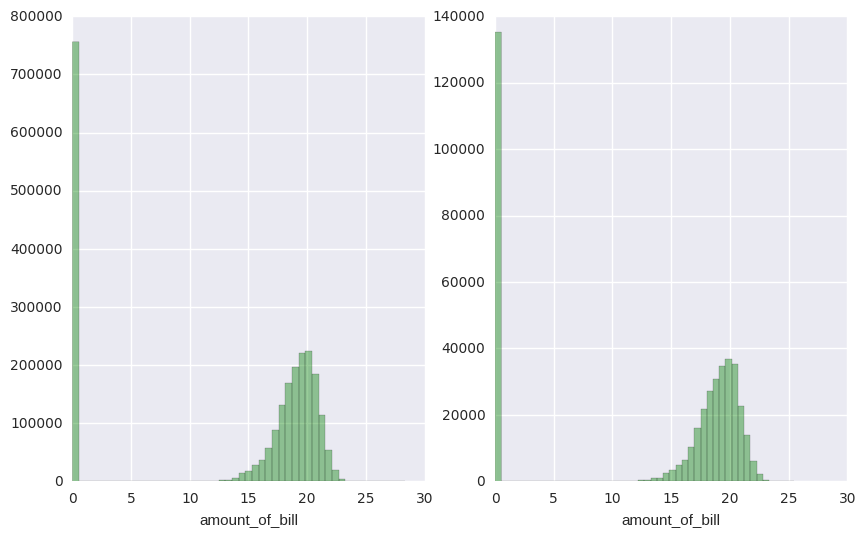

In [65]:
# amount_of_bill
data = bill_train[bill_train['amount_of_bill']>=0]['amount_of_bill']
data1 = bill_test[bill_test['amount_of_bill']>=0]['amount_of_bill']
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data,ax=axes[0],color='g',kde=False)
sns.distplot(data1,ax=axes[1],color='g',kde=False)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

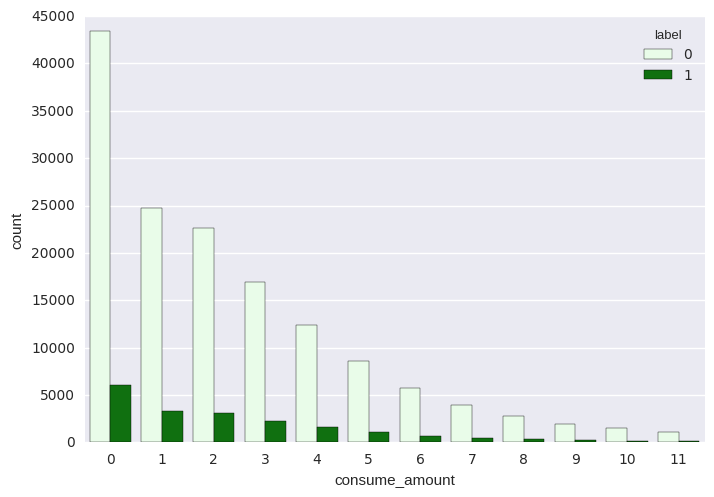

In [96]:
# consume_amount
data = bill_train[bill_train['consume_amount']<12][['userid','consume_amount','label']]
data.drop_duplicates(inplace=True)
sns.countplot(x='consume_amount',data=data,hue='label',color='g')
plt.show()

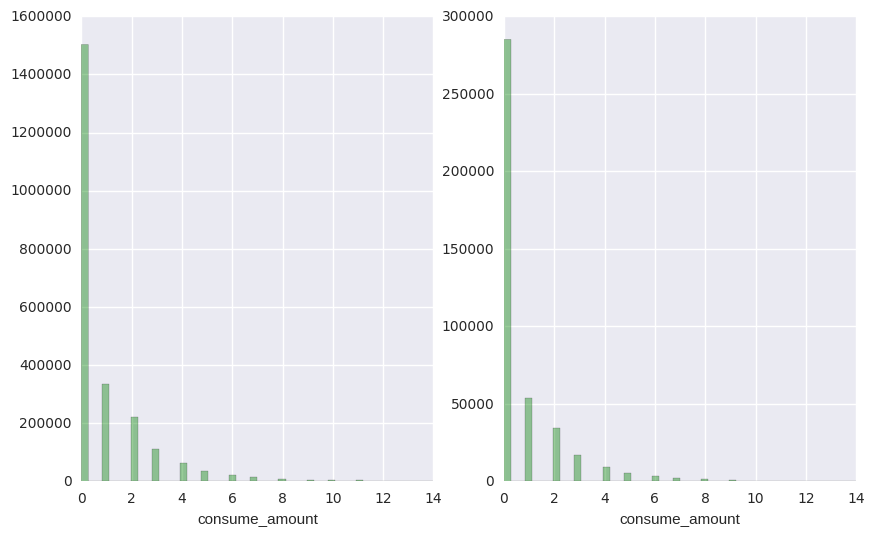

In [61]:
# consume_amount
data = bill_train[bill_train['consume_amount']<15]['consume_amount']
data1 = bill_test[bill_test['consume_amount']<15]['consume_amount']
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data,ax=axes[0],color='g',kde=False)
sns.distplot(data1,ax=axes[1],color='g',kde=False)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

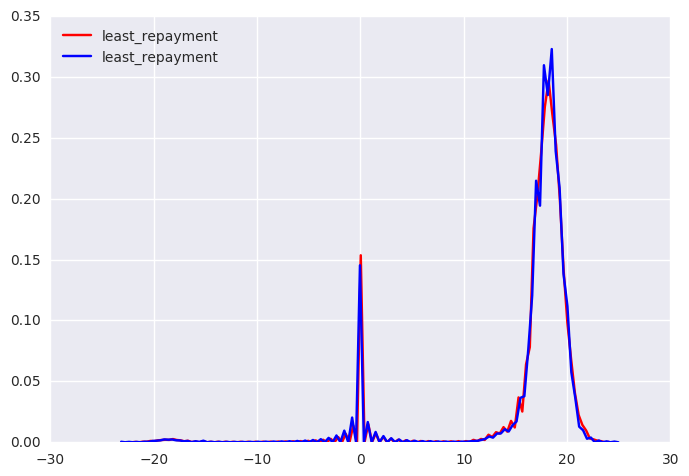

In [97]:
# least_repayment
data = bill_train
sns.kdeplot(data['least_repayment'][data['label']==1],color='r')
sns.kdeplot(data['least_repayment'][data['label']==0],color='b')
plt.show()

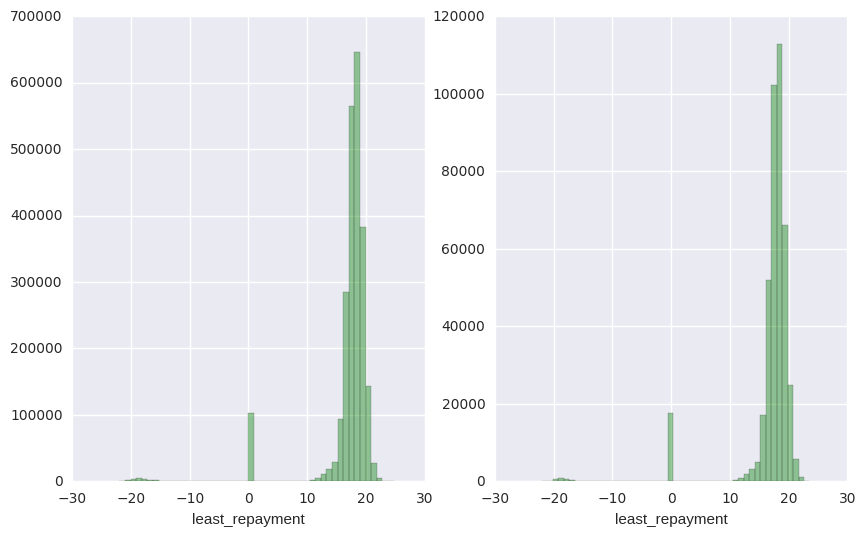

In [38]:
# least_repayment
data = bill_train['least_repayment']
data1 = bill_test['least_repayment']
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data,ax=axes[0],color='g',kde=False)
sns.distplot(data1,ax=axes[1],color='g',kde=False)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

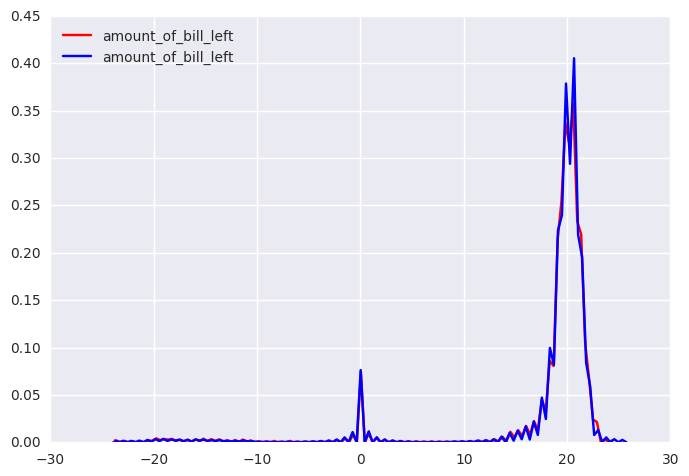

In [98]:
# amount_of_bill_left
data = bill_train
sns.kdeplot(data['amount_of_bill_left'][data['label']==1],color='r')
sns.kdeplot(data['amount_of_bill_left'][data['label']==0],color='b')
plt.show()

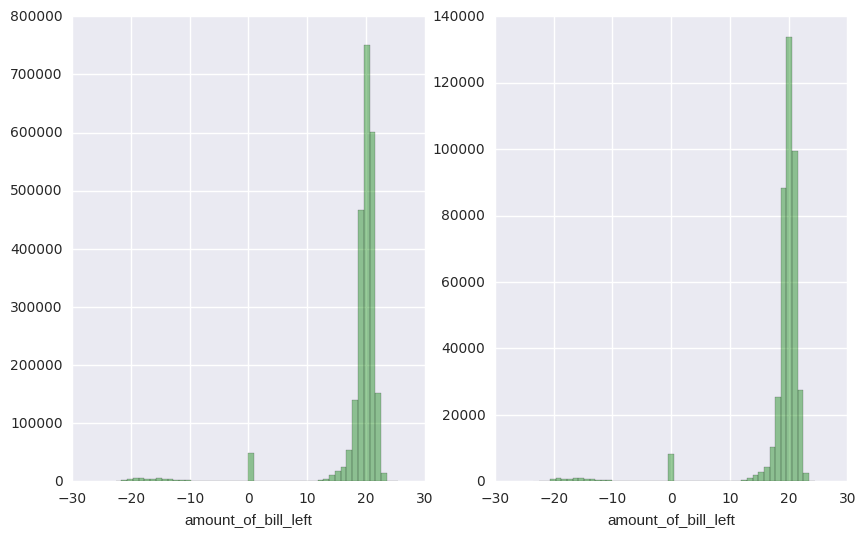

In [37]:
# amount_of_bill_left
data = bill_train['amount_of_bill_left']
data1 = bill_test['amount_of_bill_left']
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data,ax=axes[0],color='g',kde=False)
sns.distplot(data1,ax=axes[1],color='g',kde=False)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

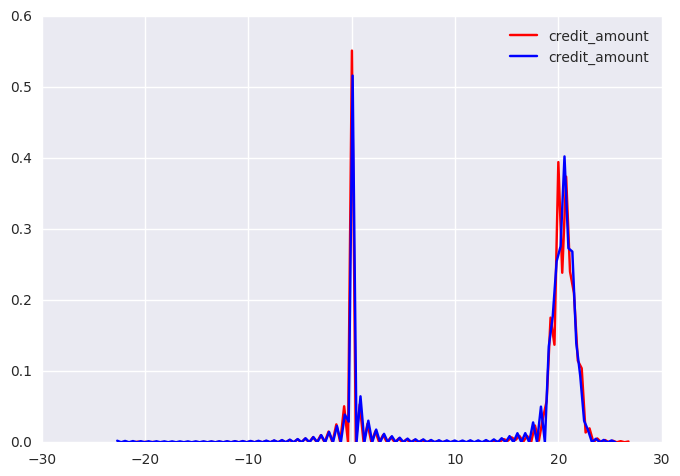

In [100]:
# credit_amount
data = bill_train
sns.kdeplot(data['credit_amount'][data['label']==1],color='r')
sns.kdeplot(data['credit_amount'][data['label']==0],color='b')
plt.show()

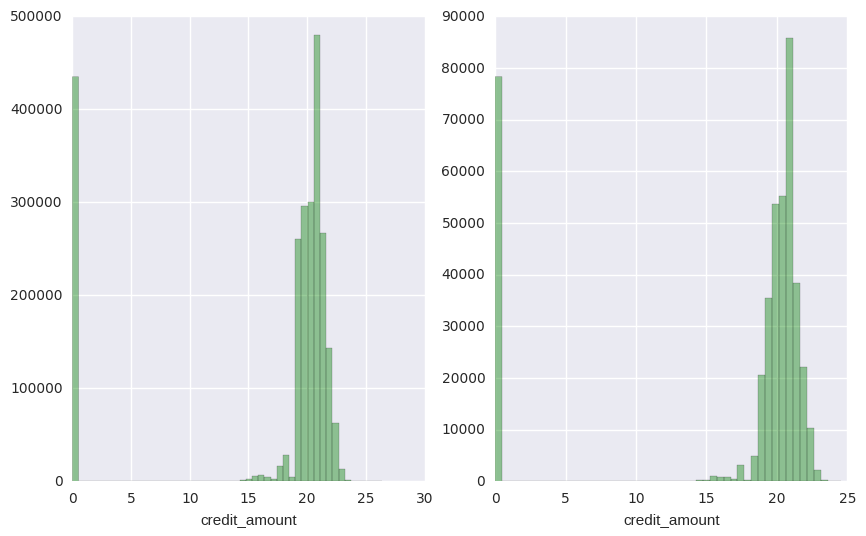

In [66]:
# credit_amount
data = bill_train[bill_train['credit_amount']>=0]['credit_amount']
data1 = bill_test[bill_test['credit_amount']>=0]['credit_amount']
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data,ax=axes[0],color='g',kde=False)
sns.distplot(data1,ax=axes[1],color='g',kde=False)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

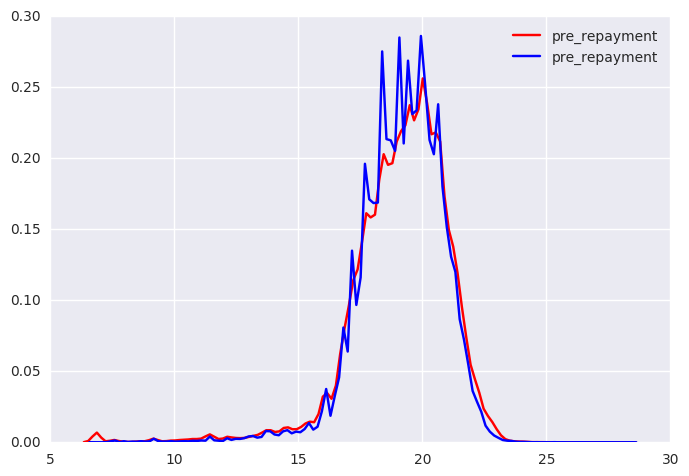

In [101]:
# pre_repayment
data = bill_train[bill_train['pre_repayment']>0]
sns.kdeplot(data['pre_repayment'][data['label']==1],color='r')
sns.kdeplot(data['pre_repayment'][data['label']==0],color='b')
plt.show()

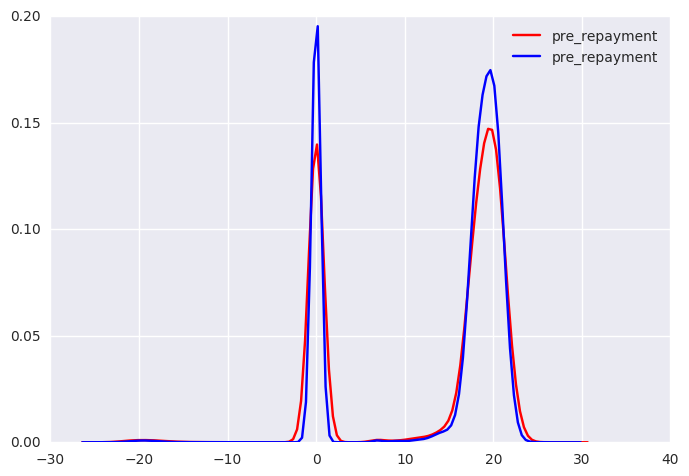

In [102]:
# pre_repayment
data = bill_train
sns.kdeplot(data['pre_repayment'][data['label']==1],color='r')
sns.kdeplot(data['pre_repayment'][data['label']==0],color='b')
plt.show()

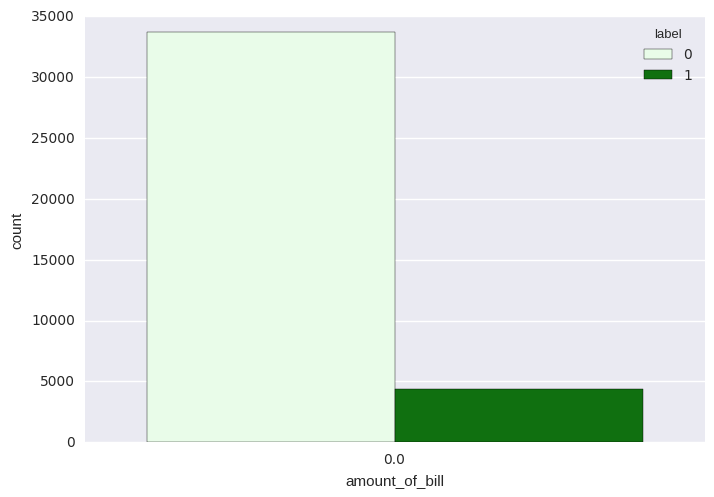

In [103]:
# amount_of_bill
data = bill_train[bill_train['amount_of_bill']==0][['userid','amount_of_bill','label']]
data.drop_duplicates(inplace=True)
sns.countplot(x='amount_of_bill',data=data,hue='label',color='g')
plt.show()

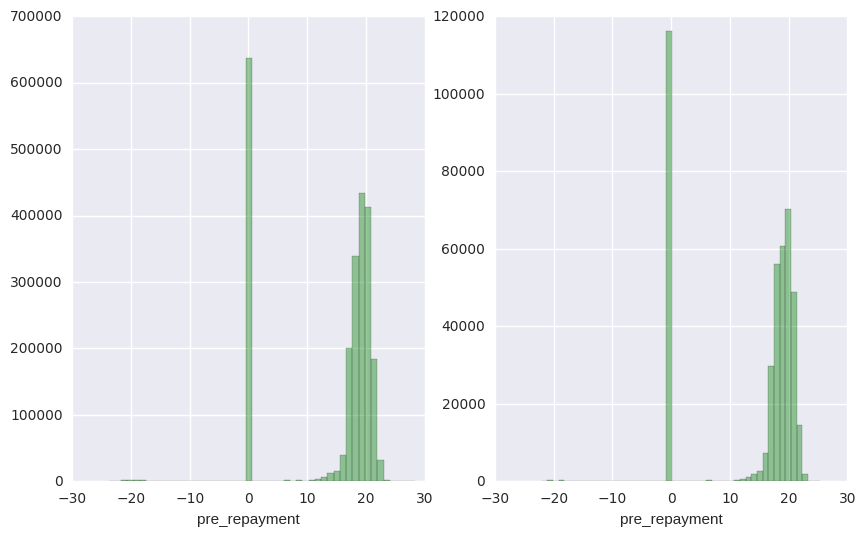

In [35]:
# pre_repayment
data = bill_train['pre_repayment']
data1 = bill_test['pre_repayment']
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data,ax=axes[0],color='g',kde=False)
sns.distplot(data1,ax=axes[1],color='g',kde=False)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

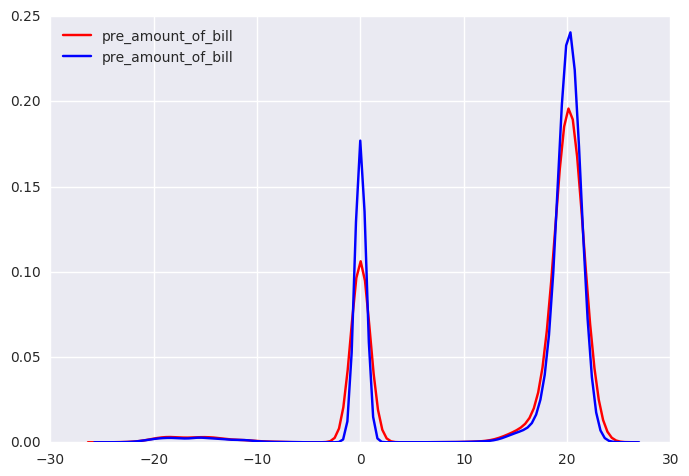

In [104]:
# pre_amount_of_bill
data = bill_train
sns.kdeplot(data['pre_amount_of_bill'][data['label']==1],color='r')
sns.kdeplot(data['pre_amount_of_bill'][data['label']==0],color='b')
plt.show()

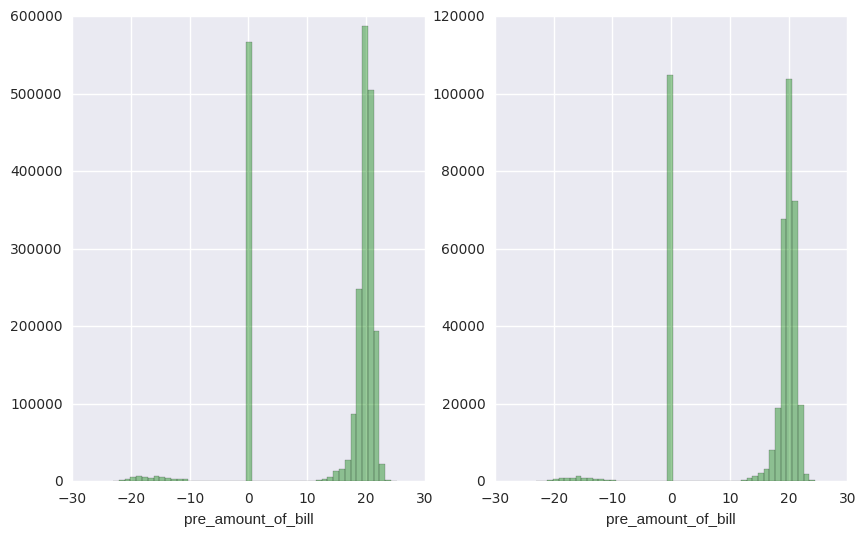

In [34]:
# pre_amount_of_bill
data = bill_train['pre_amount_of_bill']
data1 = bill_test['pre_amount_of_bill']
f,axes = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data,ax=axes[0],color='g',kde=False)
sns.distplot(data1,ax=axes[1],color='g',kde=False)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

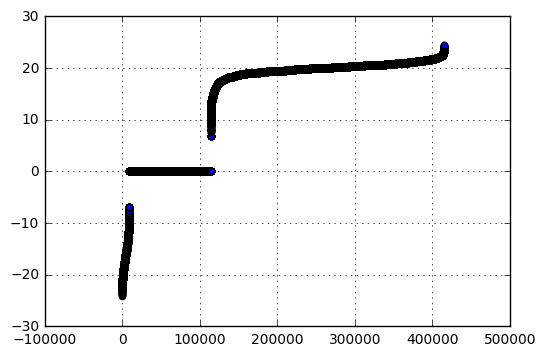

In [5]:
# pre_repayment
data = bill_test['pre_amount_of_bill'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [18]:
# pre_amount_of_bill
data = bill_train['pre_amount_of_bill'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,userid,bank_id,bank_n
0,3150,6,1
1,3150,6,1
2,3150,6,1
3,3150,6,1
4,3150,6,1


In [28]:
tt = t.groupby(['userid','bank_id'])['bank_n'].agg(lambda x: 1)

In [34]:
data = tt.sum(level='userid')
data.head()

userid
2    3
3    1
4    3
5    1
6    3
Name: bank_n, dtype: int64

In [3]:
#  1)获取消费笔数 ,消费笔数从 sum 改成 mean
consume_amount = bill_data[['userid','consume_amount']]
consume_amount = consume_amount[consume_amount['consume_amount']!=0]  # 只选不为 0 的数
consume_amount.head()

,userid,consume_amount
0,3150,1
1,3150,1
2,3150,1
3,3150,1
4,3150,1


In [4]:
#  获取银行卡单笔消费的最大值
consume_amount_max = pd.pivot_table(consume_amount,index=['userid'],values=['consume_amount'],aggfunc=np.max)
consume_amount_max.columns = ['consume_amount_max']
consume_amount_max.head()

,consume_amount_max
userid,
2,9
3,3
4,2
6,9
7,14


In [5]:
#  获取银行卡消费的最大值
consume_amount_min = pd.pivot_table(consume_amount,index=['userid'],values=['consume_amount'],aggfunc=np.min)
consume_amount_min.columns = ['consume_amount_min']
consume_amount_min.head()

,consume_amount_min
userid,
2,1
3,1
4,2
6,1
7,1


In [6]:
data = consume_amount_min.join(consume_amount_max)
data['consume_amount_sub'] = data['consume_amount_max'] - data['consume_amount_min']
data.head()

,consume_amount_min,consume_amount_max,consume_amount_sub
userid,,,
2,1,9,8
3,1,3,2
4,2,2,0
6,1,9,8
7,1,14,13


In [7]:
#  消费笔数，信用卡额度 credit_amount，本期余额 amount_of_bill_left，上期还款金额 pre_repayment    本期账单金额 amount_of_bill
#  获取最大值，最小值，每张卡的平均值的最小，大值
data_max_min = data.copy()
cols = [ 'credit_amount','amount_of_bill_left', 'pre_repayment','amount_of_bill']

for col in cols:
    datas = bill_data[['userid',col]]
    datas = datas[datas[col]!=0]  # 只选不为 0 的数
    data_max = pd.pivot_table(datas,index=['userid'],values=[col],aggfunc=np.max)  # 获取最大值
    data_max.columns = [ "{}_max".format(col) ]
    data_min = pd.pivot_table(datas,index=['userid'],values=[col],aggfunc=np.min)  # 获取最大值
    data_min.columns = [ "{}_min".format(col) ]
    data_max_min = data_max_min.join([data_max,data_min])
    data_max_min['{}_sub'.format(col)] = data_max_min[ "{}_max".format(col) ] - data_max_min["{}_min".format(col) ]

data_max_min.head()

,consume_amount_min,consume_amount_max,consume_amount_sub,credit_amount_max,credit_amount_min,credit_amount_sub,amount_of_bill_left_max,amount_of_bill_left_min,amount_of_bill_left_sub,pre_repayment_max,pre_repayment_min,pre_repayment_sub,amount_of_bill_max,amount_of_bill_min,amount_of_bill_sub
userid,,,,,,,,,,,,,,,
2,1,9,8,21.580708,19.460445,2.120263,21.605425,16.656269,4.949156,21.693954,15.606691,6.087263,21.680054,14.632132,7.047922
3,1,3,2,18.361833,18.361833,0.000000,18.371030,18.325511,0.045519,19.495329,17.665019,1.830310,19.480767,17.682056,1.798711
4,2,2,0,20.441274,19.054980,1.386294,20.575036,15.825675,4.749361,19.483836,15.827316,3.656520,19.553419,14.052314,5.501105
6,1,9,8,21.497327,19.971271,1.526056,21.198821,-18.105068,39.303889,21.177840,17.799714,3.378126,20.850423,17.667665,3.182758
7,1,14,13,22.743859,14.855275,7.888584,22.253768,-20.194633,42.448401,22.790348,12.840374,9.949974,22.639326,12.840374,9.798952


In [8]:
consume_amount_bank = bill_data[['userid','bank_id','consume_amount']]
consume_amount_bank = consume_amount_bank[consume_amount_bank['consume_amount']!=0]  # 只选不为 0 的数
consume_amount_bank_sum = pd.pivot_table(consume_amount_bank,index=['userid','bank_id'],values=['consume_amount'],aggfunc=np.sum)
consume_amount_bank_sum.columns = ['consume_amount_bank_sum']
consume_amount_bank_sum.head()

consume_amount_bank_sum
userid bank_id                         
2      4                             15
       9                              1
       16                            42
3      2                              4
4      3                              2

In [10]:
consume_amount_bank_sum_max = consume_amount_bank_sum.max(level='userid')
consume_amount_bank_sum_max.columns = ['consume_amount_bank_sum_max']

consume_amount_bank_sum_min = consume_amount_bank_sum.min(level='userid')
consume_amount_bank_sum_min.columns = ['consume_amount_bank_sum_min']

consume_amount_bank_sum_mean = consume_amount_bank_sum.mean(level='userid')
consume_amount_bank_sum_mean.columns = ['consume_amount_bank_sum_mean']

consume_amount_bank_sum_min_max = consume_amount_bank_sum_min.join([consume_amount_bank_sum_max,consume_amount_bank_sum_mean])
consume_amount_bank_sum_min_max.head()

,consume_amount_bank_sum_min,consume_amount_bank_sum_max,consume_amount_bank_sum_mean
userid,,,
2,1,42,19.333333
3,4,4,4.000000
4,2,2,2.000000
6,43,79,61.000000
7,4,168,63.500000


In [11]:
#  每张卡的平均值的最大值
consume_amount_bank = bill_data[['userid','bank_id','consume_amount']]
consume_amount_bank = consume_amount_bank[consume_amount_bank['consume_amount']!=0]  # 只选不为 0 的数
consume_amount_bank_mean = pd.pivot_table(consume_amount_bank,index=['userid','bank_id'],values=['consume_amount'],aggfunc=np.mean)
consume_amount_bank_mean.columns = ['consume_amount_bank']
consume_amount_bank_mean.head()

consume_amount_bank
userid bank_id                     
2      4                   2.142857
       9                   1.000000
       16                  4.200000
3      2                   2.000000
4      3                   2.000000

In [12]:
data = consume_amount_bank_mean.max(level='userid')
data.columns = ['consume_amount_bank_mean_max']
data.head()

,consume_amount_bank_mean_max
userid,
2,4.200000
3,2.000000
4,2.000000
6,6.076923
7,8.400000


In [13]:
consume_amount_bank_mean_min = consume_amount_bank_mean.min(level='userid')
consume_amount_bank_mean_min.columns = ['consume_amount_bank_mean_min']
data = data.join(consume_amount_bank_mean_min)
data.head()

,consume_amount_bank_mean_max,consume_amount_bank_mean_min
userid,,
2,4.200000,1.000000
3,2.000000,2.000000
4,2.000000,2.000000
6,6.076923,2.866667
7,8.400000,1.636364


In [14]:
#    每张卡 消费笔数，信用卡额度 credit_amount，本期余额 amount_of_bill_left，上期还款金额 pre_repayment   本期账单金额 amount_of_bill  本期账单最低还款额 least_repayment
#  获取最大值
data_bank_max_min = data.copy()
cols = [ 'credit_amount','amount_of_bill_left', 'pre_repayment','amount_of_bill']
for col in cols:
    datas = bill_data[['userid','bank_id',col]]
    datas = datas[datas[col]!=0]  # 只选不为 0 的数
       
    datas_mean = pd.pivot_table(datas,index=['userid','bank_id'],values=[col],aggfunc=np.mean)
    
    data_bank_mean_max = datas_mean.max(level='userid')
    data_bank_mean_max.columns = ["{}_bank_mean_max".format(col)]
        
    data_bank_mean_min = datas_mean.min(level='userid')
    data_bank_mean_min.columns = ["{}_bank_mean_min".format(col)]
    
    data_bank_max_min = data_bank_max_min.join([data_bank_mean_max,data_bank_mean_min])

data_bank_max_min.head()

,consume_amount_bank_mean_max,consume_amount_bank_mean_min,credit_amount_bank_mean_max,credit_amount_bank_mean_min,amount_of_bill_left_bank_mean_max,amount_of_bill_left_bank_mean_min,pre_repayment_bank_mean_max,pre_repayment_bank_mean_min,amount_of_bill_bank_mean_max,amount_of_bill_bank_mean_min
userid,,,,,,,,,,
2,4.200000,1.000000,21.580708,19.573962,21.556798,18.529893,20.865134,18.354507,21.262652,17.793175
3,2.000000,2.000000,18.361833,18.361833,18.348270,18.348270,18.580174,18.580174,18.581412,18.581412
4,2.000000,2.000000,20.441274,19.054980,19.770999,17.172708,17.815314,17.815314,19.054980,17.445363
6,6.076923,2.866667,21.102763,20.112310,20.390617,17.371213,19.354634,19.103623,19.724092,19.041710
7,8.400000,1.636364,21.051069,15.366101,21.857444,-6.291857,22.321026,12.840374,22.295138,12.840374


In [15]:
result = data_max_min.join([data_bank_max_min,consume_amount_bank_sum_min_max])
result['bill_tag'] = 1
result.head()

,consume_amount_min,consume_amount_max,consume_amount_sub,credit_amount_max,credit_amount_min,credit_amount_sub,amount_of_bill_left_max,amount_of_bill_left_min,amount_of_bill_left_sub,pre_repayment_max,...,amount_of_bill_left_bank_mean_max,amount_of_bill_left_bank_mean_min,pre_repayment_bank_mean_max,pre_repayment_bank_mean_min,amount_of_bill_bank_mean_max,amount_of_bill_bank_mean_min,consume_amount_bank_sum_min,consume_amount_bank_sum_max,consume_amount_bank_sum_mean,bill_tag
userid,,,,,,,,,,,,,,,,,,,,,
2,1,9,8,21.580708,19.460445,2.120263,21.605425,16.656269,4.949156,21.693954,...,21.556798,18.529893,20.865134,18.354507,21.262652,17.793175,1,42,19.333333,1
3,1,3,2,18.361833,18.361833,0.000000,18.371030,18.325511,0.045519,19.495329,...,18.348270,18.348270,18.580174,18.580174,18.581412,18.581412,4,4,4.000000,1
4,2,2,0,20.441274,19.054980,1.386294,20.575036,15.825675,4.749361,19.483836,...,19.770999,17.172708,17.815314,17.815314,19.054980,17.445363,2,2,2.000000,1
6,1,9,8,21.497327,19.971271,1.526056,21.198821,-18.105068,39.303889,21.177840,...,20.390617,17.371213,19.354634,19.103623,19.724092,19.041710,43,79,61.000000,1
7,1,14,13,22.743859,14.855275,7.888584,22.253768,-20.194633,42.448401,22.790348,...,21.857444,-6.291857,22.321026,12.840374,22.295138,12.840374,4,168,63.500000,1


In [17]:
result.to_csv("../data/train/bill_detail20.csv")

In [9]:
consume_amount_mean = pd.pivot_table(consume_amount,index=['userid'],values=['consume_amount'],aggfunc=np.mean)
consume_amount_mean.columns = ['consume_amount_mean']
consume_amount_mean.head()

,consume_amount_mean
userid,
2,3.222222
3,2.000000
4,2.000000
6,4.357143
7,4.792453


In [15]:
# 信用卡额度 credit_amount,删除 缺失值
credit_amount = bill_data[['userid','bank_id','credit_amount']]
credit_amount = credit_amount[credit_amount['credit_amount']!=0]  # 只选不为 0 的数
credit_amount_mean = pd.pivot_table(credit_amount,index=['userid','bank_id'],values=['credit_amount'],aggfunc=np.mean)
credit_amount_mean.columns = ['credit_amount_mean']
credit_amount_mean.head()

credit_amount_mean
userid bank_id                    
2      4                 19.573962
       9                 19.971271
       16                21.580708
3      2                 18.361833
4      3                 20.441274

In [16]:
# 去所有信用卡额度平均值的最大值
credit_amount_bank_max = credit_amount_mean.max(level='userid')
credit_amount_bank_max.columns = ['credit_amount_bank_max']
credit_amount_bank_max.head()

,credit_amount_bank_max
userid,
2,21.580708
3,18.361833
4,20.441274
5,20.664418
6,21.102763


In [17]:
credit_amount_bank_min = credit_amount_mean.min(level='userid')
credit_amount_bank_min.columns = ['credit_amount_bank_min']
credit_amount_bank_min.head()

,credit_amount_bank_min
userid,
2,19.573962
3,18.361833
4,19.054980
5,20.664418
6,20.112310


In [21]:
credit_amount_bank = credit_amount_bank_max.join(credit_amount_bank_min)
credit_amount_bank.head()

,credit_amount_bank_max,credit_amount_bank_min
userid,,
2,21.580708,19.573962
3,18.361833,18.361833
4,20.441274,19.054980
5,20.664418,20.664418
6,21.102763,20.112310


In [23]:
#  本期余额 amount_of_bill_left
amount_of_bill_left = bill_data[['userid','bank_id','amount_of_bill_left']]
amount_of_bill_left = amount_of_bill_left[amount_of_bill_left['amount_of_bill_left']!=0]  # 只选不为 0 的数
amount_of_bill_left = pd.pivot_table(amount_of_bill_left,index=['userid','bank_id'],values=['amount_of_bill_left'],aggfunc=np.mean)
amount_of_bill_left.columns = ['amount_of_bill_left']
amount_of_bill_left.head()

amount_of_bill_left
userid bank_id                     
2      4                  18.596662
       9                  18.529893
       16                 21.556798
3      2                  18.348270
4      3                  19.770999

In [24]:
amount_of_bill_left_max = amount_of_bill_left.max(level='userid')
amount_of_bill_left_max.columns = ['amount_of_bill_left_max']
amount_of_bill_left_max.head()

,amount_of_bill_left_max
userid,
2,21.556798
3,18.348270
4,19.770999
5,20.636046
6,20.390617


In [26]:
amount_of_bill_left_min = amount_of_bill_left.min(level='userid')
amount_of_bill_left_min.columns = ['amount_of_bill_left_min']
amount_of_bill_left_min.head()

,amount_of_bill_left_min
userid,
2,18.529893
3,18.348270
4,17.172708
5,20.636046
6,17.371213


In [30]:
amount_of_bill_left_max1 = bill_data[['userid','amount_of_bill_left']]
amount_of_bill_left_max1 = amount_of_bill_left_max1[amount_of_bill_left_max1['amount_of_bill_left']!=0]  # 只选不为 0 的数

amount_of_bill_left_max11 = pd.pivot_table(amount_of_bill_left_max1,index=['userid'],values=['amount_of_bill_left'],aggfunc=np.max)
amount_of_bill_left_max11.columns = ['amount_of_bill_left_max11']
amount_of_bill_left_max11.head()

,amount_of_bill_left_max11
userid,
2,21.605425
3,18.371030
4,20.575036
5,20.676582
6,21.198821


In [31]:
amount_of_bill_left_min11 = pd.pivot_table(amount_of_bill_left_max1,index=['userid'],values=['amount_of_bill_left'],aggfunc=np.min)
amount_of_bill_left_min11.columns = ['amount_of_bill_left_min11']
amount_of_bill_left_min11.head()

,amount_of_bill_left_min11
userid,
2,16.656269
3,18.325511
4,15.825675
5,20.595510
6,-18.105068


In [33]:
amount_of_bill_left_merge = amount_of_bill_left_max.join([amount_of_bill_left_min,amount_of_bill_left_max11,amount_of_bill_left_min11])
amount_of_bill_left_merge.head()

,amount_of_bill_left_max,amount_of_bill_left_min,amount_of_bill_left_max11,amount_of_bill_left_min11
userid,,,,
2,21.556798,18.529893,21.605425,16.656269
3,18.348270,18.348270,18.371030,18.325511
4,19.770999,17.172708,20.575036,15.825675
5,20.636046,20.636046,20.676582,20.595510
6,20.390617,17.371213,21.198821,-18.105068


In [34]:
amount_of_bill_left_merge['amount_of_bill_left_sub'] = amount_of_bill_left_merge['amount_of_bill_left_max11']-amount_of_bill_left_merge['amount_of_bill_left_min11']
amount_of_bill_left_merge.head()

,amount_of_bill_left_max,amount_of_bill_left_min,amount_of_bill_left_max11,amount_of_bill_left_min11,amount_of_bill_left_sub
userid,,,,,
2,21.556798,18.529893,21.605425,16.656269,4.949156
3,18.348270,18.348270,18.371030,18.325511,0.045519
4,19.770999,17.172708,20.575036,15.825675,4.749361
5,20.636046,20.636046,20.676582,20.595510,0.081072
6,20.390617,17.371213,21.198821,-18.105068,39.303889


In [35]:
# 上期还款金额 pre_repayment
pre_repayment = bill_data[['userid','bank_id','pre_repayment']]
pre_repayment = pre_repayment[pre_repayment['pre_repayment']!=0]  # 只选不为 0 的数

pre_repayment_bank_mean = pd.pivot_table(pre_repayment,index=['userid','bank_id'],values=['pre_repayment'],aggfunc=np.mean)
pre_repayment_bank_mean.columns = ['pre_repayment_bank_mean']
pre_repayment_bank_mean.head()

pre_repayment_bank_mean
userid bank_id                         
2      4                      18.354507
       9                      18.584781
       16                     20.865134
3      2                      18.580174
4      7                      17.815314

In [39]:
pre_repayment_bank_mean_max = pre_repayment_bank_mean.max(level='userid')
pre_repayment_bank_mean_max.columns = ['pre_repayment_bank_mean_max']

pre_repayment_bank_mean_max.head()

,pre_repayment_bank_mean_max
userid,
2,20.865134
3,18.580174
4,17.815314
5,18.539760
6,19.354634


In [42]:
"""
pre_repayment_bank_mean_min = pre_repayment_bank_mean.min(level='userid')
pre_repayment_bank_mean_min.columns = ['pre_repayment_bank_mean_min']

pre_repayment_bank_mean_min.head()
"""

"\npre_repayment_bank_mean_min = pre_repayment_bank_mean.min(level='userid')\npre_repayment_bank_mean_min.columns = ['pre_repayment_bank_mean_min']\n\npre_repayment_bank_mean_min.head()\n"

In [36]:
pre_repayment_bank_max = pd.pivot_table(pre_repayment,index=['userid','bank_id'],values=['pre_repayment'],aggfunc=np.max)
pre_repayment_bank_max.columns = ['pre_repayment_bank_max']
pre_repayment_bank_max.head()

pre_repayment_bank_max
userid bank_id                        
2      4                     19.509829
       9                     19.484314
       16                    21.693954
3      2                     19.495329
4      7                     19.483836

In [43]:
pre_repayment_bank_max_max = pre_repayment_bank_max.max(level='userid')
pre_repayment_bank_max_max.columns = ['pre_repayment_bank_max_max']
pre_repayment_bank_max_max.head()

,pre_repayment_bank_max_max
userid,
2,21.693954
3,19.495329
4,19.483836
5,18.560684
6,21.177840


In [37]:
pre_repayment_bank_min = pd.pivot_table(pre_repayment,index=['userid','bank_id'],values=['pre_repayment'],aggfunc=np.min)
pre_repayment_bank_min.columns = ['pre_repayment_bank_min']
pre_repayment_bank_min.head()

pre_repayment_bank_min
userid bank_id                        
2      4                     17.389606
       9                     17.455492
       16                    15.606691
3      2                     17.665019
4      7                     15.827316

In [44]:
pre_repayment_bank_min_min = pre_repayment_bank_min.min(level='userid')
pre_repayment_bank_min_min.columns = ['pre_repayment_bank_min_min']
pre_repayment_bank_min_min.head()

,pre_repayment_bank_min_min
userid,
2,15.606691
3,17.665019
4,15.827316
5,18.518836
6,17.799714


In [45]:
pre_repayment_bank = pre_repayment_bank_max_max.join(pre_repayment_bank_min_min)
pre_repayment_bank['pre_repayment_bank_max_min_sub'] = pre_repayment_bank['pre_repayment_bank_max_max'] - pre_repayment_bank['pre_repayment_bank_min_min']
pre_repayment_bank.head()

,pre_repayment_bank_max_max,pre_repayment_bank_min_min,pre_repayment_bank_max_min_sub
userid,,,
2,21.693954,15.606691,6.087263
3,19.495329,17.665019,1.830310
4,19.483836,15.827316,3.656520
5,18.560684,18.518836,0.041848
6,21.177840,17.799714,3.378126


In [2]:
import pandas as pd

In [3]:
a=pd.DataFrame({'a':[2,3],'b':[4,3]})
a

,a,b
0,2,4
1,3,3


In [11]:
t = a.sort('b',ascending=False)
t

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,a,b
0,2,4
1,3,3


In [6]:
a.loc[0,'a']

2